<a href="https://colab.research.google.com/github/aakanksha215/BoneAbnormalityDetection/blob/main/BoneAbnormality_MURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakankshachamoli1","key":"416a83c4f4ff2b5dcb309d5dfcd232fc"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download cjinny/mura-v11

Dataset URL: https://www.kaggle.com/datasets/cjinny/mura-v11
License(s): unknown
 99% 3.12G/3.14G [00:40<00:00, 134MB/s]
100% 3.14G/3.14G [00:41<00:00, 82.3MB/s]


In [5]:
!unzip mura-v11.zip

Streaming output truncated to the last 5000 lines.
  inflating: MURA-v1.1/train/XR_WRIST/patient08489/study1_negative/image3.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08489/study1_negative/image4.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08490/study1_negative/image1.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08490/study1_negative/image2.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08490/study1_negative/image3.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08491/study1_negative/image1.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08491/study1_negative/image2.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08492/study1_negative/image1.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08492/study1_negative/image2.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08493/study1_negative/image1.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08493/study1_negative/image2.png  
  inflating: MURA-v1.1/train/XR_WRIST/patient08493/study1_negative/im

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from glob import glob

In [7]:
path = '/content/MURA-v1.1'
train_image_paths_csv = "train_image_paths.csv"

In [8]:
train_images_paths = pd.read_csv(os.path.join(path,train_image_paths_csv),dtype=str,header=None)
train_images_paths.columns = ['image_path']

In [9]:
print(train_images_paths.head(1))

                                          image_path
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...


In [10]:
train_images_paths['image_path'][0]

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'

In [11]:
train_images_paths['label'] = train_images_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
train_images_paths['category']  = train_images_paths['image_path'].apply(lambda x: x.split('/')[2])
train_images_paths['patientId']  = train_images_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))
train_images_paths.head()

,image_path,label,category,patientId
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,positive,XR_SHOULDER,00001
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,XR_SHOULDER,00002
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,positive,XR_SHOULDER,00002


In [12]:
total_number_of_training_images = np.shape(train_images_paths)[0]
print("total number of images:",total_number_of_training_images)
print ("\n\nnumber of null values", train_images_paths.isnull().sum())
print("\n\nnumber of training images:",np.shape(train_images_paths['image_path'])[0])

categories_counts = pd.DataFrame(train_images_paths['category'].value_counts())
print ('\n\ncategories:\n',categories_counts)
print('\n\nnumber of patients:',train_images_paths['patientId'].nunique())
print('\n\nnumber of labels:',train_images_paths['label'].nunique())
print ('\n\npositive casses:',len(train_images_paths[train_images_paths['label']=='positive']))
print ('\n\nnegative casses:',len(train_images_paths[train_images_paths['label']=='negative']))

total number of images: 36808


number of null values image_path    0
label         0
category      0
patientId     0
dtype: int64


number of training images: 36808


categories:
              count
category          
XR_WRIST      9752
XR_SHOULDER   8379
XR_HAND       5543
XR_FINGER     5106
XR_ELBOW      4931
XR_FOREARM    1825
XR_HUMERUS    1272


number of patients: 11184


number of labels: 2


positive casses: 14873


negative casses: 21935


In [13]:
valid_image_paths_csv = "valid_image_paths.csv"
valid_data_paths = pd.read_csv(os.path.join(path,valid_image_paths_csv),dtype=str,header=None)
valid_data_paths.columns = ['image_path']
print (valid_data_paths.head(5))

                                          image_path
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [14]:
valid_data_paths['label'] = valid_data_paths['image_path'].map(lambda x:'positive' if 'positive' in x else 'negative')
valid_data_paths['category']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[2])
valid_data_paths['dir'] =  valid_data_paths['image_path'].apply(lambda x: x.split('/')[1])
valid_data_paths['patientId']  = valid_data_paths['image_path'].apply(lambda x: x.split('/')[3].replace('patient',''))
valid_data_paths.head(5)


,image_path,label,category,dir,patientId
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,positive,XR_WRIST,valid,11185
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,positive,XR_WRIST,valid,11186


In [15]:
print("data_shape:",np.shape(valid_data_paths))
print ("\n\nnumber of null values", valid_data_paths.isnull().sum())
print("\n\nnumber of training images:",np.shape(valid_data_paths['image_path']))

validaton_categories_counts = pd.DataFrame(valid_data_paths['category'].value_counts())
print ('\n\ncategories:\n',validaton_categories_counts)
print('\n\nnumber of patients:',valid_data_paths['patientId'].nunique())
print('\n\nnumber of labels:',valid_data_paths['label'].nunique())
print ('\n\npositive casses:',len(valid_data_paths[valid_data_paths['label']=='positive']))
print ('\n\nnegative casses:',len(valid_data_paths[valid_data_paths['label']=='negative']))

data_shape: (3197, 5)


number of null values image_path    0
label         0
category      0
dir           0
patientId     0
dtype: int64


number of training images: (3197,)


categories:
              count
category          
XR_WRIST       659
XR_SHOULDER    563
XR_ELBOW       465
XR_FINGER      461
XR_HAND        460
XR_FOREARM     301
XR_HUMERUS     288


number of patients: 783


number of labels: 2


positive casses: 1530


negative casses: 1667


In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
print(train_images_paths.head(5))

                                          image_path     label     category  \
0  MURA-v1.1/train/XR_SHOULDER/patient00001/study...  positive  XR_SHOULDER   
1  MURA-v1.1/train/XR_SHOULDER/patient00001/study...  positive  XR_SHOULDER   
2  MURA-v1.1/train/XR_SHOULDER/patient00001/study...  positive  XR_SHOULDER   
3  MURA-v1.1/train/XR_SHOULDER/patient00002/study...  positive  XR_SHOULDER   
4  MURA-v1.1/train/XR_SHOULDER/patient00002/study...  positive  XR_SHOULDER   

  patientId  
0     00001  
1     00001  
2     00001  
3     00002  
4     00002  


In [19]:
print(valid_data_paths.head(5))

                                          image_path     label  category  \
0  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...  positive  XR_WRIST   
1  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...  positive  XR_WRIST   
2  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...  positive  XR_WRIST   
3  MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...  positive  XR_WRIST   
4  MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...  positive  XR_WRIST   

     dir patientId  
0  valid     11185  
1  valid     11185  
2  valid     11185  
3  valid     11185  
4  valid     11186  



```
# Model Training
```



In [20]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [21]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_images_paths,
    x_col='image_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=valid_data_paths,
    x_col='image_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 36808 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam


In [23]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [25]:
base_model = DenseNet169(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [26]:
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-80:]:
    layer.trainable = True

In [27]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [28]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

In [29]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 689s 542ms/step - accuracy: 0.6751 - auc: 0.7148 - loss: 0.6219 - val_accuracy: 0.7576 - val_auc: 0.8219 - val_loss: 0.5230
Epoch 2/10
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 543s 472ms/step - accuracy: 0.7587 - auc: 0.8147 - loss: 0.5141 - val_accuracy: 0.7695 - val_auc: 0.8377 - val_loss: 0.5154
Epoch 3/10
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 532s 462ms/step - accuracy: 0.7784 - auc: 0.8389 - loss: 0.4788 - val_accuracy: 0.7817 - val_auc: 0.8528 - val_loss: 0.4985
Epoch 4/10
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 531s 461ms/step - accuracy: 0.7957 - auc: 0.8563 - loss: 0.4548 - val_accuracy: 0.7704 - val_auc: 0.8511 - val_loss: 0.5224
Epoch 5/10
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 536s 465ms/step - accuracy: 0.8144 - auc: 0.8765 - loss: 0.4229 - val_accuracy: 0.7532 - val_auc: 0.8435 - val_loss: 0.5854
Epoch 6/10
1151/1151 ━━━━━━━━━━━━━━━━━━━━ 538s 467ms/step - accuracy: 0.8233 - auc: 0.8888 - loss: 0.4010 - val_accuracy: 0.7754 - val_auc: 0.8432 - val_loss: 0.5263
Epoc

In [35]:
import numpy as np

# Get true labels
y_true = val_generator.classes

# Predict probabilities
y_pred_prob = model.predict(val_generator)

# Convert probabilities to binary (0/1)
y_pred = (y_pred_prob > 0.4).astype(int).ravel()

100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step


In [31]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [36]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_prob)

cm = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))

Accuracy: 0.777291210509853
Precision: 0.7680209698558322
Recall (Sensitivity): 0.7660130718954249
F1 Score: 0.7670157068062827
ROC-AUC: 0.8472372192228221

Confusion Matrix:
 [[1313  354]
 [ 358 1172]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1667
           1       0.77      0.77      0.77      1530

    accuracy                           0.78      3197
   macro avg       0.78      0.78      0.78      3197
weighted avg       0.78      0.78      0.78      3197



In [37]:
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)

print("Specificity:", specificity)

Specificity: 0.7876424715056989


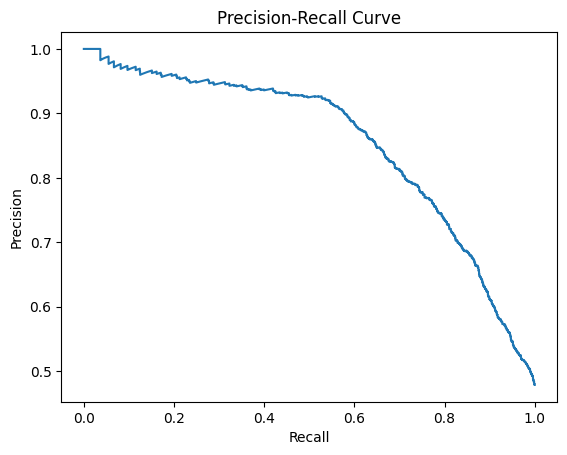

In [38]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, thresholds = precision_recall_curve(y_true, y_pred_prob)

plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

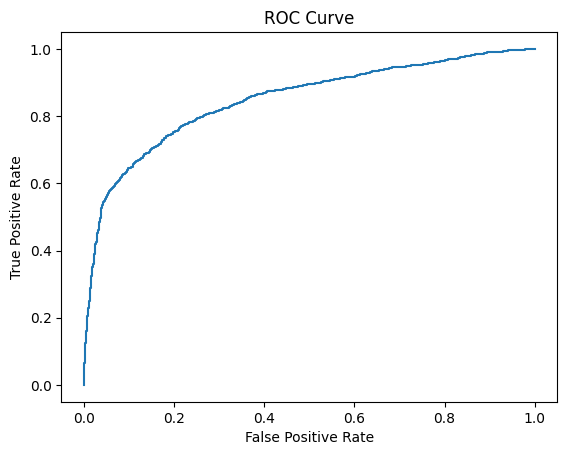

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
base_model_resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

In [ ]:
for layer in base_model_resnet.layers:
    layer.trainable = False

In [ ]:
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

In [ ]:
model_resnet.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

In [ ]:
history = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)